# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [45]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [11]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 630


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [12]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=metric&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | vaini
Processing Record 3 of Set 1 | huilong
Processing Record 4 of Set 1 | hithadhoo
Processing Record 5 of Set 1 | saleaula
City not found. Skipping...
Processing Record 6 of Set 1 | cidreira
Processing Record 7 of Set 1 | kruisfontein
Processing Record 8 of Set 1 | omboue
Processing Record 9 of Set 1 | saint-philippe
Processing Record 10 of Set 1 | chokurdakh
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | qaanaaq
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | kaitangata
Processing Record 15 of Set 1 | albert town
Processing Record 16 of Set 1 | shirokiy
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | aklavik
Processing Record 19 of Set 1 | leningradskiy
Processing Record 20 of Set 1 | betare oya
Processing Record 21 of Set 1 | mar del plata
Processing Record 22 of Set 1 | doha
P

In [13]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [14]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.1203,-134.9692,25.86,76,5,7.50,PF,1675538226
1,vaini,-21.2000,-175.2000,27.09,89,20,4.63,TO,1675538228
2,huilong,31.8111,121.6550,3.29,80,100,2.76,CN,1675538228
3,hithadhoo,-0.6000,73.0833,27.38,73,100,7.23,MV,1675538229
4,cidreira,-30.1811,-50.2056,25.02,70,86,5.22,BR,1675538229


In [15]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [16]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rikitea,-23.1203,-134.9692,25.86,76,5,7.50,PF,1675538226
1,vaini,-21.2000,-175.2000,27.09,89,20,4.63,TO,1675538228
2,huilong,31.8111,121.6550,3.29,80,100,2.76,CN,1675538228
3,hithadhoo,-0.6000,73.0833,27.38,73,100,7.23,MV,1675538229
4,cidreira,-30.1811,-50.2056,25.02,70,86,5.22,BR,1675538229


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

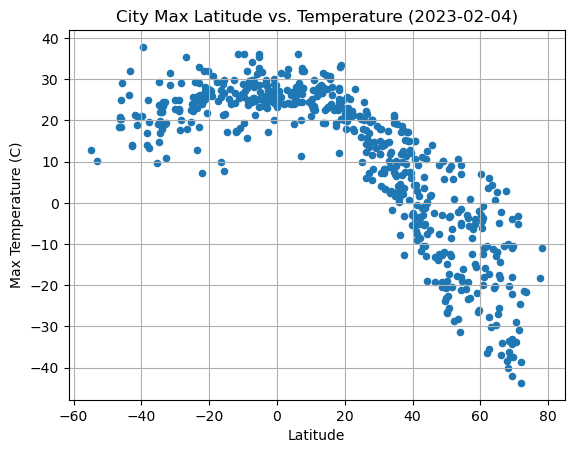

In [31]:
# Build scatter plot for latitude vs. temperature
ax1 = city_data_df.plot.scatter(x="Lat",y="Max Temp")


# Incorporate the other graph properties
plt.title ("City Max Latitude vs. Temperature (2023-02-04)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()


# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

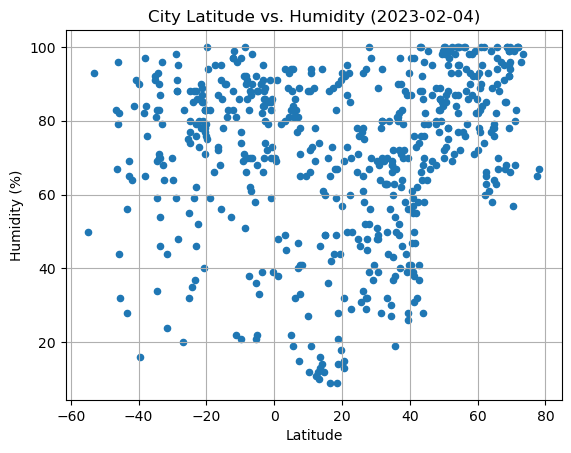

In [32]:
# Build the scatter plots for latitude vs. humidity
ax2 = city_data_df.plot.scatter(x="Lat",y="Humidity")

# Incorporate the other graph properties
plt.title ("City Latitude vs. Humidity (2023-02-04)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

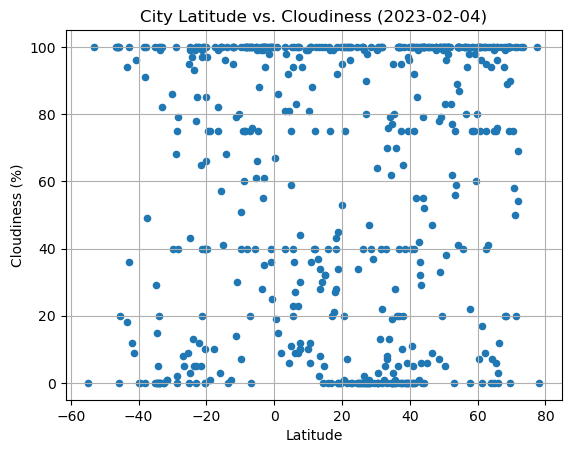

In [34]:
# Build the scatter plots for latitude vs. cloudiness
ax3 = city_data_df.plot.scatter(x="Lat",y="Cloudiness")

# Incorporate the other graph properties
plt.title ("City Latitude vs. Cloudiness (2023-02-04)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

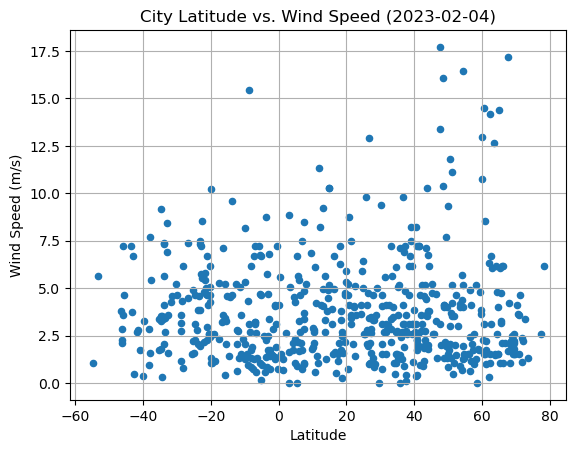

In [35]:
# Build the scatter plots for latitude vs. wind speed
ax4 = city_data_df.plot.scatter(x="Lat",y="Wind Speed")

# Incorporate the other graph properties
plt.title ("City Latitude vs. Wind Speed (2023-02-04)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [97]:
# Define a function to create Linear Regression plots
def lin_regression (x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    regress_values = x_values * slope + intercept
    #plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    #r-value
    print(f"The r-value is: {rvalue**2}")
    #line equation(placed outside of graph at figure pixel 1,1)
    plt.annotate(line_eq,xy=(1,1),xycoords="figure pixels",fontsize=15,color="red")
    plt.show()

In [41]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0 ]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,huilong,31.8111,121.6550,3.29,80,100,2.76,CN,1675538228
8,chokurdakh,70.6333,147.9167,-33.70,99,58,3.61,RU,1675538231
10,qaanaaq,77.4840,-69.3632,-18.33,65,100,2.58,GL,1675538232
13,albert town,18.2943,-77.5424,24.28,49,43,3.31,JM,1675538233
14,shirokiy,49.7580,129.5230,-20.58,99,99,1.30,RU,1675538233


In [42]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0 ]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rikitea,-23.1203,-134.9692,25.86,76,5,7.50,PF,1675538226
1,vaini,-21.2000,-175.2000,27.09,89,20,4.63,TO,1675538228
3,hithadhoo,-0.6000,73.0833,27.38,73,100,7.23,MV,1675538229
4,cidreira,-30.1811,-50.2056,25.02,70,86,5.22,BR,1675538229
5,kruisfontein,-34.0033,24.7314,21.99,70,100,3.38,ZA,1675538230


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7590911321070956


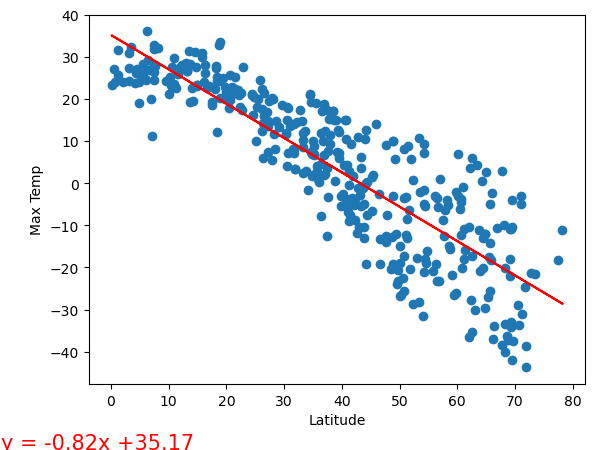

In [98]:
# Linear regression on Northern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
lin_regression(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])

The r-value is: 0.15484268010134775


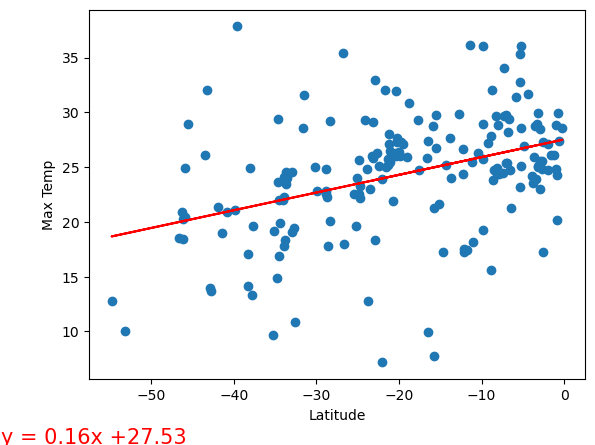

In [99]:
# Linear regression on Southern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
lin_regression(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])

In [ ]:
"""**Discussion about the linear relationship:** YOUR RESPONSE HERE

From both plots that I have generated. The linear regression of the plots for latitude vs max temperature shows that as the latitude is gets closer to 0, which is the equator, the max temperature is also goes higher and higher than the places that are further away from the equator(latitude of 0)"""

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.18148961969438032


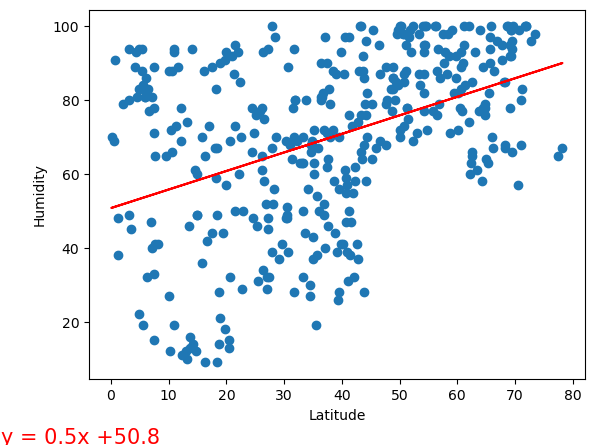

In [100]:
# Northern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Humidity")
lin_regression(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])

The r-value is: 0.011951451135981252


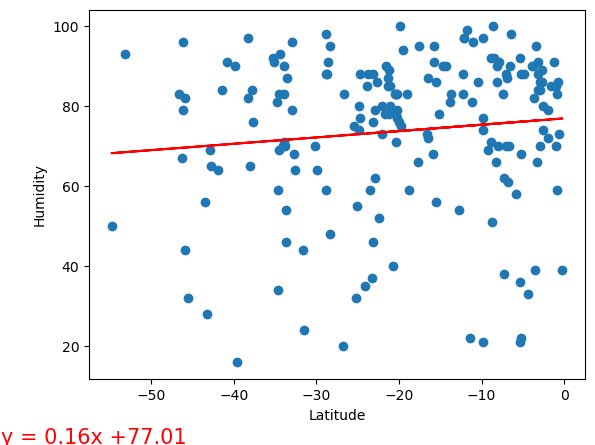

In [101]:
# Southern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Humidity")
lin_regression(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])

In [ ]:
"""**Discussion about the linear relationship:** YOUR RESPONSE HERE

From both plots that I have generated. The linear regression of the plots for latitude vs humidity shows that as the latitude has no huge effect on the hudimity of the city, only a slight effect when the latitude increases, the humidity also increases.""" 


### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.05428109993532803


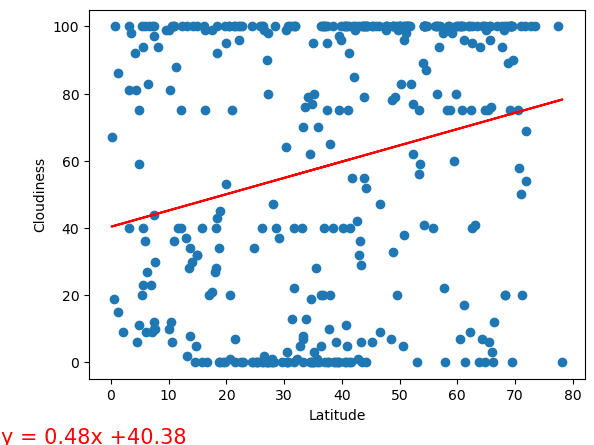

In [102]:
# Northern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
lin_regression(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])

The r-value is: 0.10119133618459808


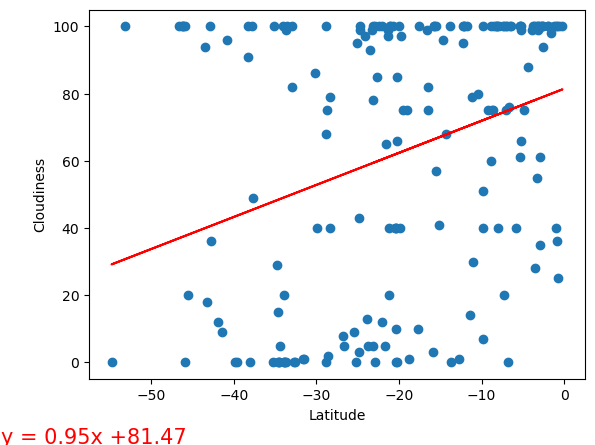

In [103]:
# Southern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
lin_regression(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])

In [ ]:
"""**Discussion about the linear relationship:** YOUR RESPONSE HERE
From both plots that I have generated. The linear regression of the plots for latitude vs cloudiness shows that as the latitude increases, the chance of cloudiness also increases. """

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0004059049942847426


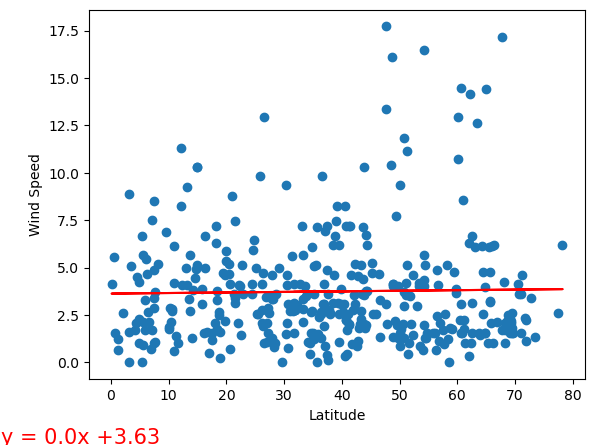

In [104]:
# Northern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
lin_regression(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])

The r-value is: 0.011961677656494302


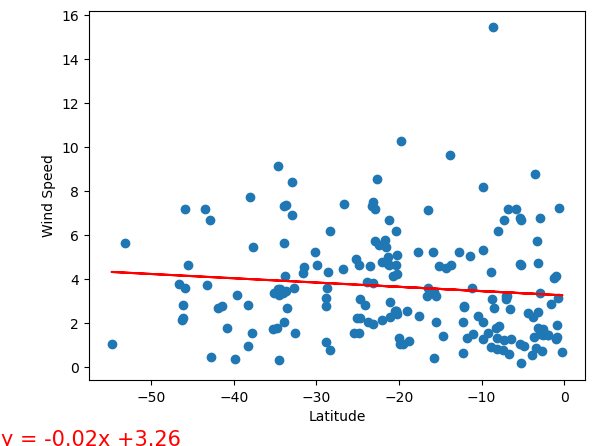

In [105]:
# Southern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
lin_regression(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
"""**Discussion about the linear relationship:** YOUR RESPONSE HERE
From both plots that I have generated. The linear regression of the plots for 
latitude vs wind speed shows no correlation to each other. both plots essentially 
shows a slope that is close to zero.  """